# Data Loading

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


# Exploratory Data Analysis

## Descriptive statistic

In [ ]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


## Dataframe Structure

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

## Heatmap

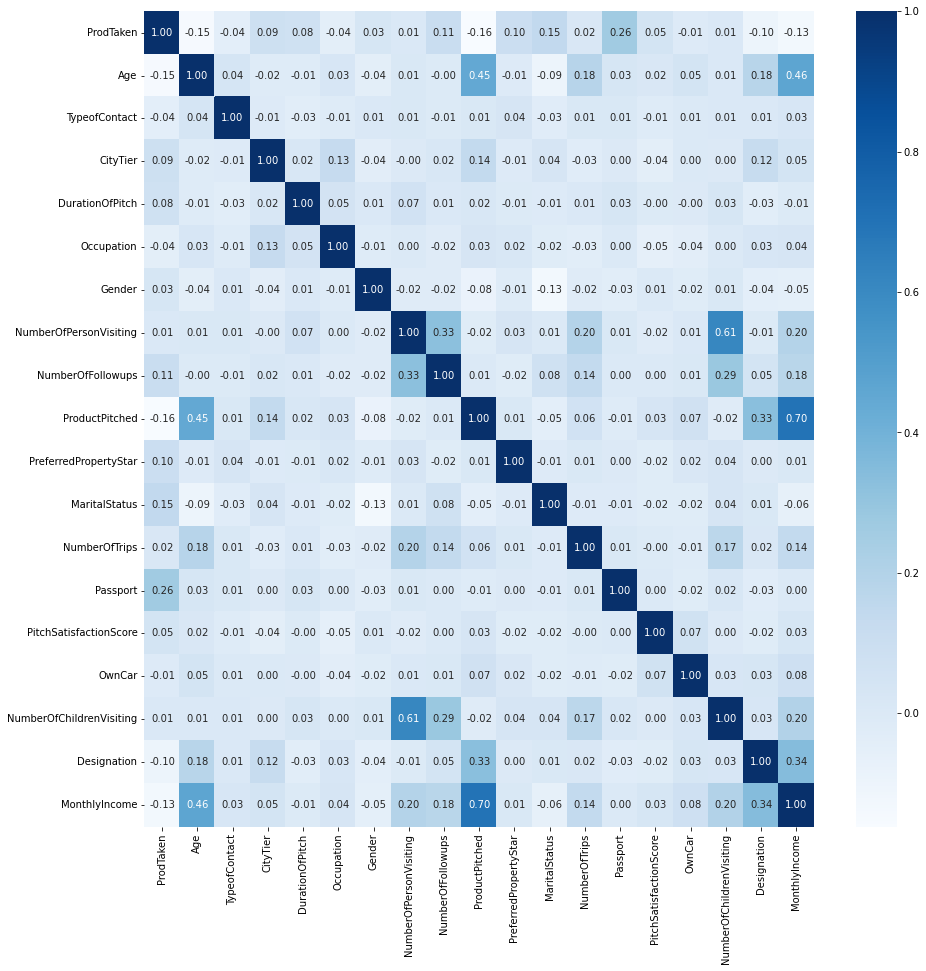

In [ ]:
df_heatmap = df.copy()

del df_heatmap['CustomerID']

for col_name in df_heatmap.columns:
    if(df_heatmap[col_name].dtype == 'object'):
        df_heatmap[col_name]= df_heatmap[col_name].astype('category')
        df_heatmap[col_name] = df_heatmap[col_name].cat.codes
        
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 15))
sns.heatmap(df_heatmap.corr(), cmap='Blues', annot=True, fmt='.2f');

## Discussion result

### The feature that will be needed to build machine learning model are:

+ Based on the instruction :
    + Designation
    + Passport
    + Tier City
    + Martial status
    + occupation
    + monthly income
    + age
    + properties

+ Based on the correlation (above 0.3) :
    + numberOfFollowups
    + monthly income
    + age
    + numberOfPersonVisiting
    + numberOfChildrenVisiting
    + ProductPitched
    + Designation
    + Product taken


# Data Cleansing

## Feature Selection

In [ ]:
df_selected = df[['Designation', 'Passport', 'CityTier', 'MaritalStatus', 
                  'Occupation', 'MonthlyIncome',  'Age', 'PreferredPropertyStar'
                  ,'NumberOfFollowups', 'NumberOfPersonVisiting', 'NumberOfChildrenVisiting', 
                  'ProductPitched']].copy()
df_selected.head(3)

,Designation,Passport,CityTier,MaritalStatus,Occupation,MonthlyIncome,Age,PreferredPropertyStar,NumberOfFollowups,NumberOfPersonVisiting,NumberOfChildrenVisiting,ProductPitched
0,Manager,1,3,Single,Salaried,20993.0,41.0,3.0,3.0,3,0.0,Deluxe
1,Manager,0,1,Divorced,Salaried,20130.0,49.0,4.0,4.0,3,2.0,Deluxe
2,Executive,1,1,Single,Free Lancer,17090.0,37.0,3.0,4.0,3,0.0,Basic


## Missing Values

In [ ]:
df_selected.isnull().sum(axis=0)

Designation                   0
Passport                      0
CityTier                      0
MaritalStatus                 0
Occupation                    0
MonthlyIncome               233
Age                         226
PreferredPropertyStar        26
NumberOfFollowups            45
NumberOfPersonVisiting        0
NumberOfChildrenVisiting     66
ProductPitched                0
dtype: int64

In [ ]:
# Replaced with mean
df_selected['Age'].fillna(round(df['Age'].mean()), inplace=True)
df_selected['MonthlyIncome'].fillna(round(df['MonthlyIncome'].mean()), inplace=True)

# Replaced with median
df_selected['NumberOfFollowups'].fillna(df['NumberOfFollowups'].median(), inplace=True)

# Replaced with mode
df_selected['NumberOfChildrenVisiting'].fillna(df['NumberOfChildrenVisiting'].mode()[0], inplace=True)
df_selected['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].mode()[0], inplace=True)

In [ ]:
df_selected.isnull().sum(axis=0)

Designation                 0
Passport                    0
CityTier                    0
MaritalStatus               0
Occupation                  0
MonthlyIncome               0
Age                         0
PreferredPropertyStar       0
NumberOfFollowups           0
NumberOfPersonVisiting      0
NumberOfChildrenVisiting    0
ProductPitched              0
dtype: int64

## Duplicate Value

In [ ]:
df_selected.duplicated().sum()

395

In [ ]:
print('Duplicate Checking')
print('Before duplicate rows = ' + str(df_selected.shape))
df_selected = df_selected.drop_duplicates()
print('After duplicate rows = ' + str(df_selected.shape))

Duplicate Checking
Before duplicate rows = (4888, 12)
After duplicate rows = (4493, 12)


## Outlier values

In [ ]:
nums = ['MonthlyIncome', 'Age', 'PreferredPropertyStar', 'NumberOfFollowups', 'NumberOfPersonVisiting', 'NumberOfChildrenVisiting']

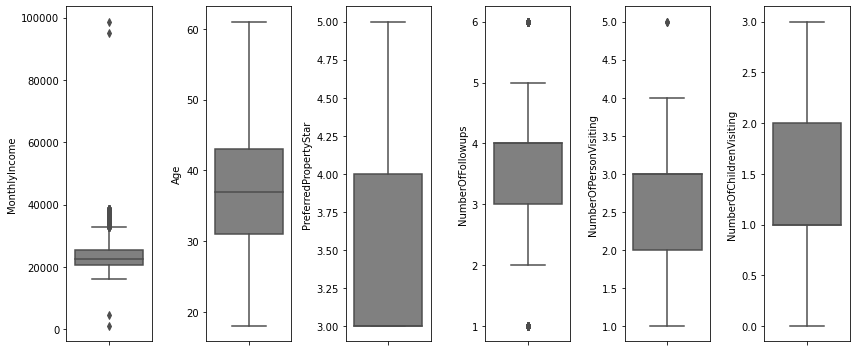

In [ ]:
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df_selected[nums[i]], color='gray', orient='v')
    plt.tight_layout()

In [ ]:
from scipy import stats

print(f'Jumlah baris sebelum memfilter outlier: {len(df_selected)}')

filtered_entries = np.array([True] * len(df_selected))

for col in ['MonthlyIncome', 'NumberOfFollowups', 'NumberOfPersonVisiting']:
    zscore = abs(stats.zscore(df_selected[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df_selected = df_selected[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df_selected)}')

Jumlah baris sebelum memfilter outlier: 4493
Jumlah baris setelah memfilter outlier: 4489


# Feature Engineering

## Target Column Generator

Customers who have passport and are from tier 3 city and are single or unmarried, have large business such customers have higher chances of taking new package.


Customers monthly income in range of 15000- 25000, and age range 15-30, prefer 5 star properties also have higher chances of taking new package based on EDA.

In [ ]:
def segment(x):
    if x['Passport'] == 1 and x['CityTier'] == 3 and ((x['MaritalStatus'] == 'Single') or (x['MaritalStatus'] == 'Unmarried')) and x['Occupation'] == 'Large Business':
        chance = 'High'
    elif (x['MonthlyIncome'] >= 15000 and x['MonthlyIncome'] <= 25000) and (x['Age'] >= 15 and x['Age'] <= 30) and x['PreferredPropertyStar'] == 5:
        chance = 'High'
    else:
        chance = 'Low'
    return chance

In [ ]:
df_clean = df_selected.copy()

df_clean['Chance'] = df_clean.apply(lambda x: segment(x), axis=1) 
df_clean

,Designation,Passport,CityTier,MaritalStatus,Occupation,MonthlyIncome,Age,PreferredPropertyStar,NumberOfFollowups,NumberOfPersonVisiting,NumberOfChildrenVisiting,ProductPitched,Chance
0,Manager,1,3,Single,Salaried,20993.0,41.0,3.0,3.0,3,0.0,Deluxe,Low
1,Manager,0,1,Divorced,Salaried,20130.0,49.0,4.0,4.0,3,2.0,Deluxe,Low
2,Executive,1,1,Single,Free Lancer,17090.0,37.0,3.0,4.0,3,0.0,Basic,Low
3,Executive,1,1,Divorced,Salaried,17909.0,33.0,3.0,3.0,2,1.0,Basic,Low
4,Executive,0,1,Divorced,Small Business,18468.0,38.0,4.0,3.0,2,0.0,Basic,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,Manager,1,3,Unmarried,Small Business,26576.0,49.0,4.0,5.0,3,1.0,Deluxe,Low
4884,Executive,1,1,Single,Salaried,21212.0,28.0,3.0,5.0,4,2.0,Basic,Low
4885,Senior Manager,0,3,Married,Salaried,31820.0,52.0,4.0,4.0,4,3.0,Standard,Low
4886,Executive,0,3,Single,Small Business,20289.0,19.0,3.0,4.0,3,2.0,Basic,Low


In [ ]:
df_clean['Chance'].value_counts()

Low     4271
High     218
Name: Chance, dtype: int64

In [ ]:
df_clean = df_clean[df_clean['Designation'] == 'Executive']

df_clean['Chance'].value_counts()

Low     1547
High     143
Name: Chance, dtype: int64

## One Hot Encoding

In [ ]:
# One Hot encoding for designation column
Designation_dummies = pd.get_dummies(df_clean.Designation, prefix='Designation')
df_clean = pd.concat([df_clean, Designation_dummies], axis=1)
del df_clean['Designation']


# One Hot encoding for MaritalStatus column
MaritalStatus_dummies = pd.get_dummies(df_clean.MaritalStatus, prefix='MaritalStatus')
df_clean = pd.concat([df_clean, MaritalStatus_dummies], axis=1)
del df_clean['MaritalStatus']


# One Hot encoding for Occupation column
Occupation_dummies = pd.get_dummies(df_clean.Occupation, prefix='Occupation')
df_clean = pd.concat([df_clean, Occupation_dummies], axis=1)
del df_clean['Occupation']


# One Hot encoding for ProductPitched column
ProductPitched_dummies = pd.get_dummies(df_clean.ProductPitched, prefix='ProductPitched')
df_clean = pd.concat([df_clean, ProductPitched_dummies], axis=1)
del df_clean['ProductPitched']


df_clean

,Passport,CityTier,MonthlyIncome,Age,PreferredPropertyStar,NumberOfFollowups,NumberOfPersonVisiting,NumberOfChildrenVisiting,Chance,Designation_Executive,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Occupation_Free Lancer,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,ProductPitched_Basic
2,1,1,17090.0,37.0,3.0,4.0,3,0.0,Low,1,0,0,1,0,1,0,0,0,1
3,1,1,17909.0,33.0,3.0,3.0,2,1.0,Low,1,1,0,0,0,0,0,1,0,1
4,0,1,18468.0,38.0,4.0,3.0,2,0.0,Low,1,1,0,0,0,0,0,0,1,1
5,0,1,18068.0,32.0,3.0,3.0,3,1.0,Low,1,0,0,1,0,0,0,1,0,1
6,1,1,17670.0,59.0,5.0,2.0,2,1.0,Low,1,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4881,0,2,21065.0,41.0,5.0,2.0,3,2.0,Low,1,0,1,0,0,0,0,1,0,1
4882,1,2,23317.0,37.0,5.0,5.0,3,2.0,Low,1,0,1,0,0,0,0,1,0,1
4884,1,1,21212.0,28.0,3.0,5.0,4,2.0,Low,1,0,0,1,0,0,0,1,0,1
4886,0,3,20289.0,19.0,3.0,4.0,3,2.0,Low,1,0,0,1,0,0,0,0,1,1


In [ ]:
df_clean['Chance'].head(20)

NameError: ignored

## Target Class Imbalance

In [ ]:
from imblearn import under_sampling, over_sampling

X = df_clean[[col for col in df_clean.columns if (str(df_clean[col].dtype) != 'object') and col not in ['Chance']]]
y = df_clean['Chance'].values

X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(0.5).fit_resample(X, y)

C:\Users\Admin\anaconda3\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [ ]:
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

SMOTE
Low     1547
High     773
dtype: int64


In [ ]:
df_taking = df[df['ProdTaken'] == 1]
df_taking.sum()

CustomerID                                                          186400360
ProdTaken                                                                 920
Age                                                                     30459
CityTier                                                                 1674
DurationOfPitch                                                         14764
Occupation                  SalariedFree LancerSalariedSalariedSmall Busin...
Gender                      FemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleFe...
NumberOfPersonVisiting                                                   2686
NumberOfFollowups                                                        3595
ProductPitched              DeluxeBasicBasicDeluxeBasicBasicDeluxeBasicBas...
PreferredPropertyStar                                                    3424
MaritalStatus               SingleSingleSingleSingleSingleSingleDivorcedDi...
NumberOfTrips                                                   

In [ ]:
df.sum()

CustomerID                                                          989543828
ProdTaken                                                                 920
Age                                                                    175395
CityTier                                                                 8086
DurationOfPitch                                                         71831
Occupation                  SalariedSalariedFree LancerSalariedSmall Busin...
Gender                      FemaleMaleMaleFemaleMaleMaleFemaleMaleMaleMale...
NumberOfPersonVisiting                                                  14200
NumberOfFollowups                                                       17960
ProductPitched              DeluxeDeluxeBasicBasicBasicBasicBasicBasicStan...
PreferredPropertyStar                                                   17411
MaritalStatus               SingleDivorcedSingleDivorcedDivorcedSingleDivo...
NumberOfTrips                                                   